<a href="https://colab.research.google.com/github/FDS116/MIQ/blob/main/DIDAS_MIQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [1]:
#Data reading
import pandas as pd
from pandas import ExcelWriter
#Graphics
import matplotlib.pyplot as plt
#Regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
#Data division
from sklearn.model_selection import train_test_split
#Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#Data scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#DIDAS gas

In [59]:
Dida=pd.read_csv("/content/drive/MyDrive/phyton/DIDA.csv")
Dida

,Name,Formula,-∆fH°,group,CO-(O)(CO),CO-(CD)(O),CO-(C)(O),CO-(H)(O),CO-(O)(CB),O-(H)(CO),...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
0,Benzoic acid,C7H6O2,295.7,acid,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2-Methylbenzoic acid,C8H8O2,320.6,acid,0,0,0,0,1,1,...,0,0,0,2,0,0,0,1,0,0
2,3-Methylbenzoic acid,C8H8O2,327.9,acid,0,0,0,0,1,1,...,0,0,0,3,0,0,0,0,1,0
3,4-Methylbenzoic acid,C8H8O2,330.4,acid,0,0,0,0,1,1,...,0,0,0,4,0,0,0,0,0,1
4,2-Propenoic acid,C3H4O2,330.7,acid,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,p-DIDA,C24H12N2O8,NaN,acid,0,0,0,0,2,2,...,2,2,2,4,0,0,0,0,0,1
73,"3,4-DITA",C25H12N2O10,NaN,acid,0,0,0,0,3,3,...,2,2,2,3,4,0,0,0,1,1
74,"3,5-DITA",C25H12N2O10,NaN,acid,0,0,0,0,3,3,...,2,2,2,3,5,0,0,0,2,0
75,"N,N′ -(1,2-phenylene)bis(phthalimide)",C22H12N2O4,NaN,imide,0,0,0,0,0,0,...,2,2,2,2,0,0,0,1,0,0


In [60]:
Dida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            77 non-null     object 
 1   Formula         77 non-null     object 
 2   -∆fH°           71 non-null     float64
 3   group           77 non-null     object 
 4   CO-(O)(CO)      77 non-null     int64  
 5   CO-(CD)(O)      77 non-null     int64  
 6   CO-(C)(O)       77 non-null     int64  
 7   CO-(H)(O)       77 non-null     int64  
 8   CO-(O)(CB)      77 non-null     int64  
 9   O-(H)(CO)       77 non-null     int64  
 10  O-(C)(CB)       77 non-null     int64  
 11  CD-(H)(CO)      77 non-null     int64  
 12  CB-(CO)(CB)2    77 non-null     int64  
 13  CB-(O)(CB)2     77 non-null     int64  
 14  C-(CO)(C)3      77 non-null     int64  
 15  C-(H)2(CO)(C)   77 non-null     int64  
 16  C-(H)3(O)       77 non-null     int64  
 17  C-(H)3(C)       77 non-null     int64

In [61]:
#Variables
X=Dida.iloc[:-6,4:]
y=Dida.iloc[:-6,2]

In [62]:
#Compunds
nDIDA=Dida.iloc[70:, 4:]
nDIDA

,CO-(O)(CO),CO-(CD)(O),CO-(C)(O),CO-(H)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),CD-(H)(CO),CB-(CO)(CB)2,CB-(O)(CB)2,...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
70,0,0,0,0,2,2,0,0,6,0,...,2,2,2,3,0,0,0,0,1,0
71,0,0,0,0,2,2,0,0,6,0,...,2,2,2,2,0,0,0,1,0,0
72,0,0,0,0,2,2,0,0,6,0,...,2,2,2,4,0,0,0,0,0,1
73,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,4,0,0,0,1,1
74,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,5,0,0,0,2,0
75,0,0,0,0,0,0,0,0,4,0,...,2,2,2,2,0,0,0,1,0,0
76,0,0,0,0,0,0,0,0,4,0,...,2,2,2,4,0,0,0,0,0,1


In [63]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=96)

##SVR

In [64]:
#svr
svr=SVR(C=17000, kernel="linear")
svr.fit(X_train,y_train)
print(round(svr.score(X_train,y_train),4))
print(round(svr.score(X_test,y_test),4))

0.9996
0.9982


In [65]:
#Prediction
y_pred_train_svr_gas=svr.predict(X_train)
y_pred_test_svr_gas=svr.predict(X_test)
y_pred_svr_didas=svr.predict(nDIDA)

In [66]:
Prediccion=pd.DataFrame()
Prediccion["train"]=y_train
Prediccion["pred"]=y_pred_train_svr_gas.round(1)
print(Prediccion)

     train    pred
42   737.0   728.3
28   539.4   539.3
58   211.1   211.2
53   446.1   446.2
51   976.9   978.8
4    330.7   330.6
57   256.0   255.9
5    341.6   341.7
30   579.6   581.3
56   389.7   389.8
25   491.3   491.4
18   398.1   398.2
40   699.0   707.3
69   393.6   393.7
63   279.1   279.2
48   865.0   852.8
46   823.0   823.1
23   455.7   455.3
49   894.9   894.8
10   364.5   364.4
14   378.7   378.6
68   196.4   196.5
1    320.6   313.3
41   732.0   731.9
8    355.0   348.5
12   374.2   374.1
21   407.8   407.9
20   400.1   400.0
24   475.8   476.3
15   382.2   382.1
67   436.5   436.6
55  1037.1  1037.2
39   693.8   686.3
33   641.9   643.2
45   812.4   812.3
3    330.4   332.6
50   921.9   936.8
17   389.8   397.1
26   496.3   497.3
65   294.9   295.0
60   195.1   195.2
37   668.0   662.6
2    327.9   328.0
62   259.1   259.0
6    345.8   347.3
61   233.9   233.8
54   451.9   450.8
66   375.5   367.2
38   677.6   677.5


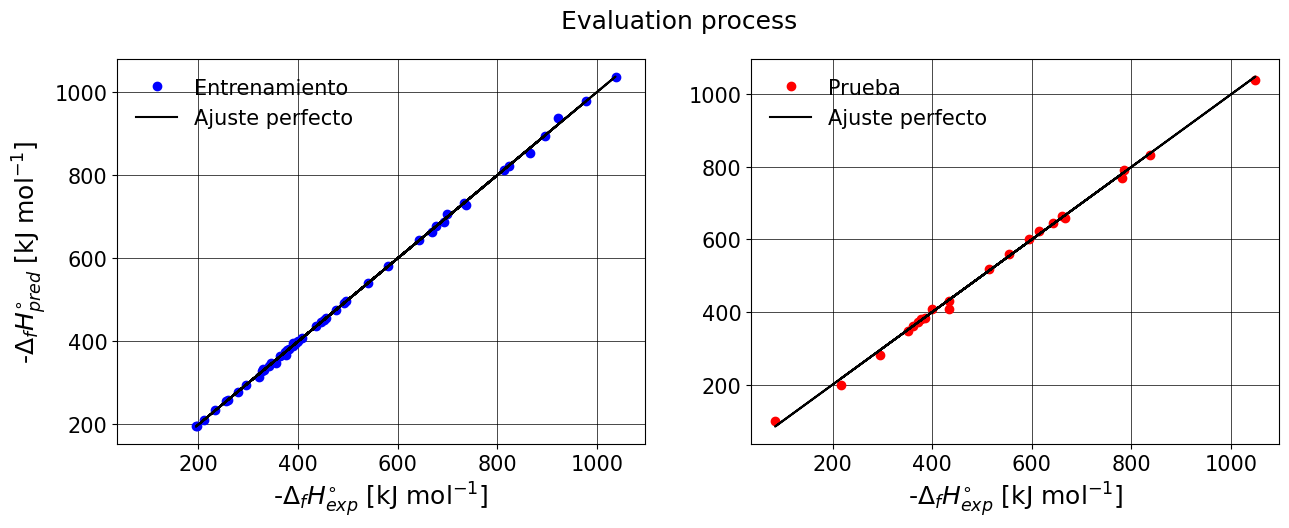

In [67]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_svr_gas, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_svr_gas, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [68]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_svr_gas),4)))
print("The MAE of the training set is: {}".format(round(mean_absolute_error(y_train,y_pred_train_svr_gas),4)))
print("The RMSE of the training set is: {}".format(round(mean_squared_error(y_train,y_pred_train_svr_gas,squared=False),4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_svr_gas),4)))
print("The MAE of the testing set is: {}".format(round(mean_absolute_error(y_test,y_pred_test_svr_gas),4)))
print("The RMSE of the testing set is: {}".format(round(mean_squared_error(y_test,y_pred_test_svr_gas,squared=False),4)))

The R² of the training set is: 0.9996
The MAE of the training set is: 2.0627
The RMSE of the training set is: 4.1354
The R² of the testing set is: 0.9982
The MAE of the testing set is: 7.6388
The RMSE of the testing set is: 9.4122


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
#DIDAS values
print("the enthalpy of formation in gas phase of o-DIDA is {}".format((y_pred_svr_didas[1]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,4-DITA is {}".format((y_pred_svr_didas[3]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,5-DITA is {}".format((y_pred_svr_didas[4]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of formation in gas phase of o-DIDA is 1024.9 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,4-DITA is 1403.9 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,5-DITA is 1406.0 kJ mol⁻¹


##KRR

In [70]:
#Data split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=200)

In [71]:
#KRR
krr=KernelRidge(alpha=0.000001, kernel="linear")
krr.fit(X_train,y_train)
print(krr.score(X_train,y_train))
print(krr.score(X_test,y_test))

0.9991974341132077
0.9977406660854305


In [72]:
#Prediction
y_pred_train_krr_gas=krr.predict(X_train)
y_pred_test_krr_gas=krr.predict(X_test)
y_pred_krr_didas=krr.predict(nDIDA)

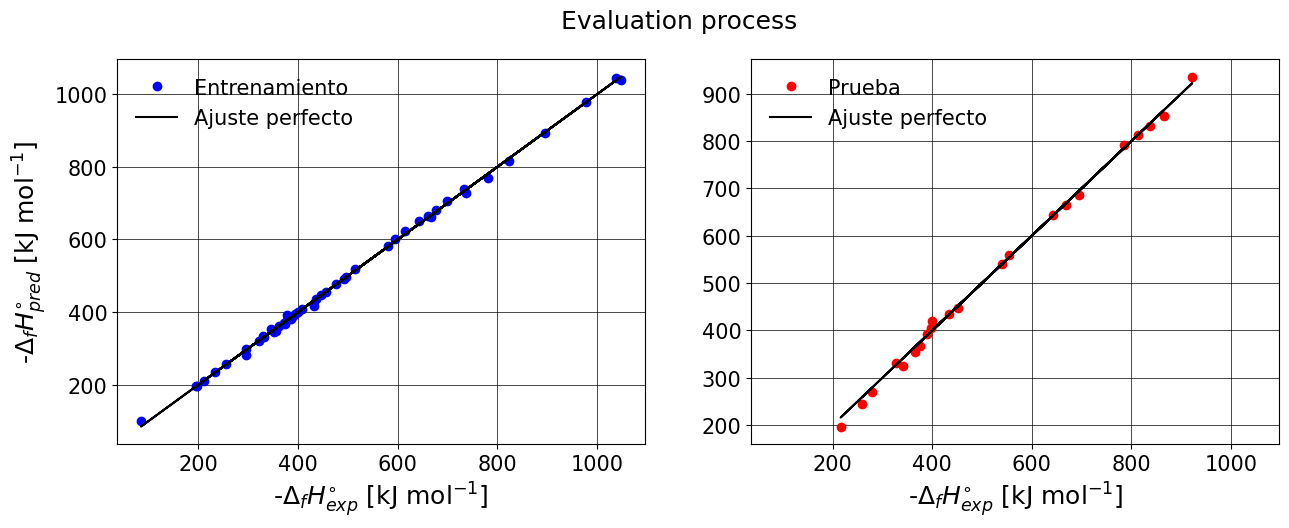

In [73]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_krr_gas, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_krr_gas, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [75]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_krr_gas),4)))
print("The MAE of the training set is: {}".format(mean_absolute_error(y_train,y_pred_train_krr_gas).round(4)))
print("The RMSE of the training set is: {}".format(mean_squared_error(y_train,y_pred_train_krr_gas,squared=False).round(4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_krr_gas),4)))
print("The MAE of the testing set is: {}".format(mean_absolute_error(y_test,y_pred_test_krr_gas).round(4)))
print("The RMSE of the testing set is: {}".format(mean_squared_error(y_test,y_pred_test_krr_gas,squared=False).round(4)))

The R² of the training set is: 0.9992
The MAE of the training set is: 4.3325
The RMSE of the training set is: 6.282
The R² of the testing set is: 0.9977
The MAE of the testing set is: 8.0945
The RMSE of the testing set is: 10.1114


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [76]:
#DIDAS values
print("the enthalpy of formation in gas phase of o-DIDA is {}".format((y_pred_krr_didas[1]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,4-DITA is {}".format((y_pred_krr_didas[4]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,5-DITA is {}".format((y_pred_krr_didas[3]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of formation in gas phase of o-DIDA is 1027.3 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,4-DITA is 1393.3 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,5-DITA is 1400.7 kJ mol⁻¹


#DIDAS crystalline

In [77]:
Didac=pd.read_csv("/content/drive/MyDrive/phyton/DIDA_c.csv")
Didac

,Name,Formula,-∆fH°,group,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),...,N-(CO)2(N),CBF-(CBF)(CB)2,rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
0,"1,2,3-Benzene tricarboxylic acid",C9H6O6,1160.4,acid,0,0,3,3,0,0,...,0,0,0,2,3,0,0,1,1,0
1,"1,3,5-Benzene tricarboxylic acid",C9H6O6,1190.1,acid,0,0,3,3,0,0,...,0,0,0,3,5,0,0,0,2,0
2,1-Naphthoic acid,C11H8O2,333.5,acid,0,0,1,1,0,0,...,0,2,0,0,0,0,0,0,0,0
3,"2,2-Diethylsuccinic acid",C8H14O4,1032.7,acid,0,2,0,2,0,0,...,0,0,0,2,2,0,0,0,0,0
4,"2,2-Dimethylpropanoic acid",C5H10O2,564.5,acid,0,1,0,1,0,0,...,0,0,0,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,p-DIDA,C24H12N2O8,NaN,acid,0,0,2,2,0,0,...,0,0,2,4,0,0,0,0,0,1
87,"3,4-DITA",C25H12N2O10,NaN,acid,0,0,3,3,0,0,...,0,0,2,3,4,0,0,0,1,1
88,"3,5-DITA",C25H12N2O10,NaN,acid,0,0,3,3,0,0,...,0,0,2,3,5,0,0,0,2,0
89,"N,N′ -(1,2-phenylene)bis(phthalimide)",C22H12N2O4,NaN,imide,0,0,0,0,0,0,...,0,0,2,2,0,0,0,1,0,0


In [78]:
Didac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              91 non-null     object 
 1   Formula           91 non-null     object 
 2   -∆fH°             84 non-null     float64
 3   group             91 non-null     object 
 4   CO-(O)(CO)        91 non-null     int64  
 5   CO-(C)(O)         91 non-null     int64  
 6   CO-(O)(CB)        91 non-null     int64  
 7   O-(H)(CO)         91 non-null     int64  
 8   O-(C)(CB)         91 non-null     int64  
 9   O-(H)(CB)         91 non-null     int64  
 10  CD-(H)(CO)        91 non-null     int64  
 11  CB-(CO)(CB)2      91 non-null     int64  
 12  CB-(O)(CB)2       91 non-null     int64  
 13  C-(CO)(C)3        91 non-null     int64  
 14  C-(H)(CO)(C)2     91 non-null     int64  
 15  C-(H)2(CO)(C)     91 non-null     int64  
 16  C-(H)3(O)         91 non-null     int64  
 17 

In [79]:
#Variables
X=Didac.iloc[:-7,4:]
y=Didac.iloc[:-7,2]

In [80]:
#Compounds
nDIDAc=Didac.iloc[84:, 4:]
nDIDAc

,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),CD-(H)(CO),CB-(CO)(CB)2,CB-(O)(CB)2,C-(CO)(C)3,...,N-(CO)2(N),CBF-(CBF)(CB)2,rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
84,0,0,2,2,0,0,0,6,0,0,...,0,0,2,2,0,0,0,1,0,0
85,0,0,2,2,0,0,0,6,0,0,...,0,0,2,3,0,0,0,0,1,0
86,0,0,2,2,0,0,0,6,0,0,...,0,0,2,4,0,0,0,0,0,1
87,0,0,3,3,0,0,0,7,0,0,...,0,0,2,3,4,0,0,0,1,1
88,0,0,3,3,0,0,0,7,0,0,...,0,0,2,3,5,0,0,0,2,0
89,0,0,0,0,0,0,0,4,0,0,...,0,0,2,2,0,0,0,1,0,0
90,0,0,0,0,0,0,0,4,0,0,...,0,0,2,4,0,0,0,0,0,1


In [81]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=116)

##SVR

In [82]:
#SVR
svr=SVR(C=1000, kernel="linear")
svr.fit(X_train,y_train)
print(round(svr.score(X_train,y_train),4))
print(round(svr.score(X_test,y_test),4))

0.9995
0.9987


In [83]:
#Prediction
y_pred_train_svr_crystalline=svr.predict(X_train)
y_pred_test_svr_crystalline=svr.predict(X_test)
y_pred_svr_didasc=svr.predict(nDIDAc)

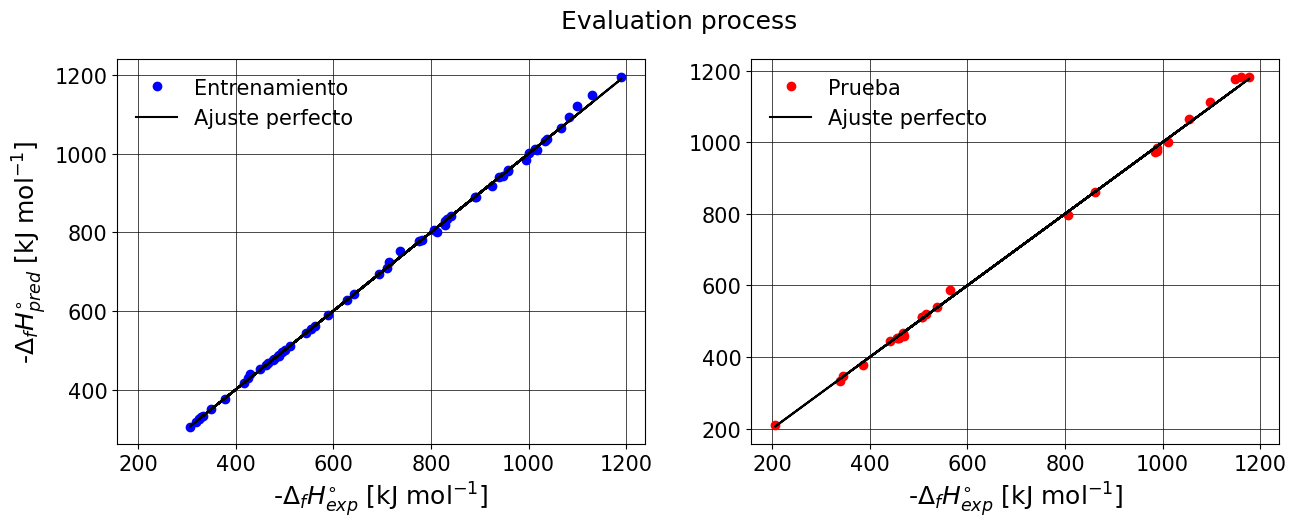

In [84]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_svr_crystalline, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_svr_crystalline, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [85]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_svr_crystalline),4)))
print("The MAE of the training set is: {}".format(mean_absolute_error(y_train,y_pred_train_svr_crystalline).round(4)))
print("The RMSE of the training set is: {}".format(mean_squared_error(y_train,y_pred_train_svr_crystalline,squared=False).round(4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_svr_crystalline),4)))
print("The MAE of the testing set is: {}".format(mean_absolute_error(y_test,y_pred_test_svr_crystalline).round(4)))
print("The RMSE of the testing set is: {}".format(mean_squared_error(y_test,y_pred_test_svr_crystalline,squared=False).round(4)))

The R² of the training set is: 0.9995
The MAE of the training set is: 2.8923
The RMSE of the training set is: 5.7509
The R² of the testing set is: 0.9987
The MAE of the testing set is: 8.4901
The RMSE of the testing set is: 10.9034


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
#DIDAS values
print("the enthalpy of formation in gas phase of o-DIDA is {}".format((y_pred_svr_didasc[0]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,4-DITA is {}".format((y_pred_svr_didasc[4]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,5-DITA is {}".format((y_pred_svr_didasc[3]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of formation in gas phase of o-DIDA is 1267.4 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,4-DITA is 1682.4 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,5-DITA is 1684.0 kJ mol⁻¹


##KRR

In [87]:
#KRR
krr=KernelRidge(alpha=0.02, kernel="linear")
krr.fit(X_train,y_train)
print(round(krr.score(X_train,y_train),4))
print(round(krr.score(X_test,y_test),4))

0.9995
0.9959


In [88]:
#Prediction
y_pred_train_krr_crystalline=krr.predict(X_train)
y_pred_test_krr_crystalline=krr.predict(X_test)
y_pred_krr_didasc=krr.predict(nDIDAc)

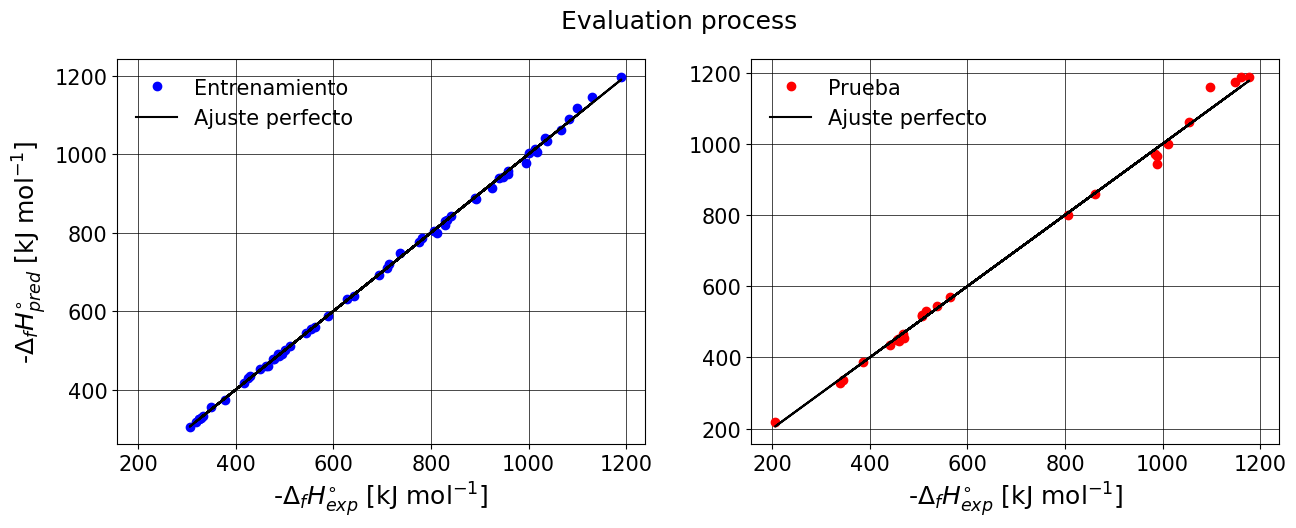

In [89]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_krr_crystalline, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_krr_crystalline, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [90]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_krr_crystalline),4)))
print("The MAE of the training set is: {}".format(mean_absolute_error(y_train,y_pred_train_krr_crystalline).round(4)))
print("The RMSE of the training set is: {}".format(mean_squared_error(y_train,y_pred_train_krr_crystalline,squared=False).round(4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_krr_crystalline),4)))
print("The MAE of the testing set is: {}".format(mean_absolute_error(y_test,y_pred_test_krr_crystalline).round(4)))
print("The RMSE of the testing set is: {}".format(mean_squared_error(y_test,y_pred_test_krr_crystalline,squared=False).round(4)))

The R² of the training set is: 0.9995
The MAE of the training set is: 4.0622
The RMSE of the training set is: 5.9195
The R² of the testing set is: 0.9959
The MAE of the testing set is: 14.1927
The RMSE of the testing set is: 19.5648


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [91]:
#DIDAS values
print("the enthalpy of formation in gas phase of o-DIDA is {}".format((y_pred_krr_didasc[0]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,4-DITA is {}".format((y_pred_krr_didasc[4]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,5-DITA is {}".format((y_pred_krr_didasc[3]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of formation in gas phase of o-DIDA is 1269.9 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,4-DITA is 1681.2 kJ mol⁻¹
the enthalpy of formation in gas phase of 3,5-DITA is 1685.0 kJ mol⁻¹


#DIDAS combustion

In [92]:
Didacomb=pd.read_csv("/content/drive/MyDrive/phyton/DIDA_comb.csv")
Didacomb

,Name,Formula,-∆cH°,group,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),...,N-(CO)2(N),CBF-(CBF)(CB)2,rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
0,Benzoic acid,C7H6O2,3228.0,acid,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2-Methylbenzoic acid,C8H8O2,3874.9,acid,0,0,1,1,0,0,...,0,0,0,2,0,0,0,1,0,0
2,3-Methylbenzoic acid,C8H8O2,3866.5,acid,0,0,1,1,0,0,...,0,0,0,3,0,0,0,0,1,0
3,4-Methylbenzoic acid,C8H8O2,3862.3,acid,0,0,1,1,0,0,...,0,0,0,4,0,0,0,0,0,1
4,"2,6-Dimethylbenzoic acid",C9H10O2,4530.1,acid,0,0,1,1,0,0,...,0,0,0,2,6,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,"3,4-DITA",C25H12N2O10,NaN,acid,0,0,3,3,0,0,...,0,0,2,3,4,0,0,0,1,1
88,"3,5-DITA",C25H12N2O10,NaN,acid,0,0,3,3,0,0,...,0,0,2,3,5,0,0,0,2,0
89,"N,N? -(1,2-phenylene)bis(phthalimide)",C22H12N2O4,NaN,imide,0,0,0,0,0,0,...,0,0,2,2,0,0,0,1,0,0
90,"N,N? -(1,3-phenylene)bis(phthalimide)",C22H12N2O4,NaN,imide,0,0,0,0,0,0,...,0,0,2,3,0,0,0,0,1,0


In [93]:
Didacomb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              92 non-null     object 
 1   Formula           92 non-null     object 
 2   -∆cH°             84 non-null     float64
 3   group             92 non-null     object 
 4   CO-(O)(CO)        92 non-null     int64  
 5   CO-(C)(O)         92 non-null     int64  
 6   CO-(O)(CB)        92 non-null     int64  
 7   O-(H)(CO)         92 non-null     int64  
 8   O-(C)(CB)         92 non-null     int64  
 9   O-(H)(CB)         92 non-null     int64  
 10  CD-(H)(CO)        92 non-null     int64  
 11  CB-(CO)(CB)2      92 non-null     int64  
 12  CB-(O)(CB)2       92 non-null     int64  
 13  C-(CO)(C)3        92 non-null     int64  
 14  C-(H)(CO)(C)2     92 non-null     int64  
 15  C-(H)2(CO)(C)     92 non-null     int64  
 16  C-(H)3(O)         92 non-null     int64  
 17 

In [94]:
#Variables
X=Didacomb.iloc[:-8,4:]
y=Didacomb.iloc[:-8,2]

In [95]:
#Compounds
nDIDAcomb=Didacomb.iloc[84:, 4:]
nDIDAcomb

,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),CD-(H)(CO),CB-(CO)(CB)2,CB-(O)(CB)2,C-(CO)(C)3,...,N-(CO)2(N),CBF-(CBF)(CB)2,rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
84,0,0,2,2,0,0,0,6,0,0,...,0,0,2,2,0,0,0,1,0,0
85,0,0,2,2,0,0,0,6,0,0,...,0,0,2,3,0,0,0,0,1,0
86,0,0,2,2,0,0,0,6,0,0,...,0,0,2,4,0,0,0,0,0,1
87,0,0,3,3,0,0,0,7,0,0,...,0,0,2,3,4,0,0,0,1,1
88,0,0,3,3,0,0,0,7,0,0,...,0,0,2,3,5,0,0,0,2,0
89,0,0,0,0,0,0,0,4,0,0,...,0,0,2,2,0,0,0,1,0,0
90,0,0,0,0,0,0,0,4,0,0,...,0,0,2,3,0,0,0,0,1,0
91,0,0,0,0,0,0,0,4,0,0,...,0,0,2,4,0,0,0,0,0,1


In [96]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=797)

##SVR

In [97]:
#SVR
svr=SVR(C=2030, kernel="linear")
svr.fit(X_train,y_train)
print(round(svr.score(X_train,y_train),5))
print(round(svr.score(X_test,y_test),4))

0.99998
0.999


In [98]:
#Prediction
y_pred_train_svr_crystalline=svr.predict(X_train)
y_pred_test_svr_crystalline=svr.predict(X_test)
y_pred_svr_didasc=svr.predict(nDIDAcomb)

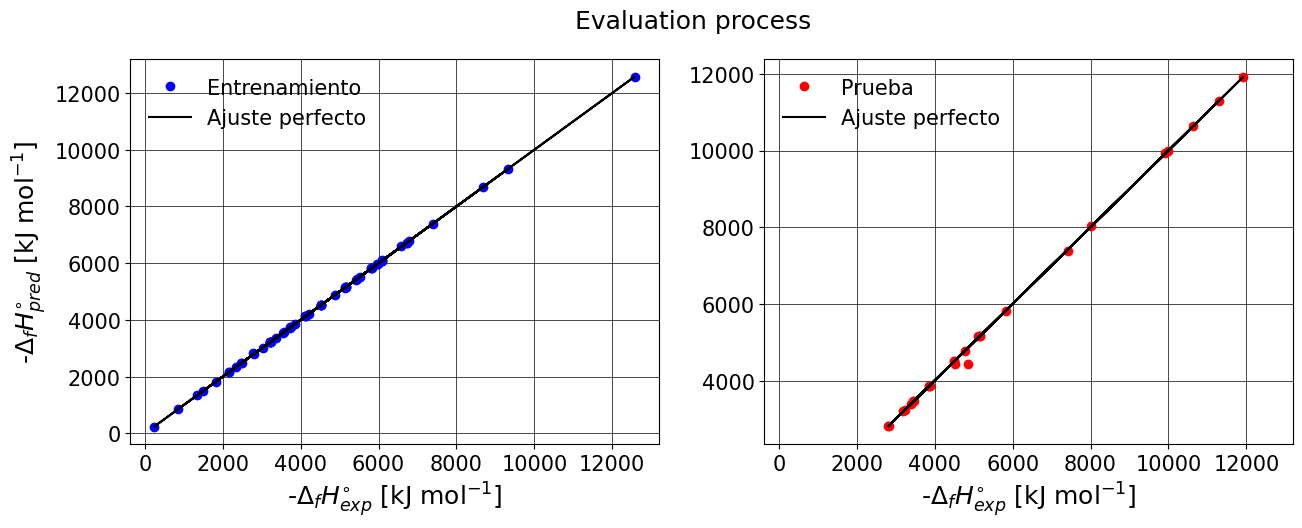

In [99]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_svr_crystalline, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_svr_crystalline, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [100]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_svr_crystalline),5)))
print("The MAE of the training set is: {}".format(mean_absolute_error(y_train,y_pred_train_svr_crystalline).round(4)))
print("The RMSE of the training set is: {}".format(mean_squared_error(y_train,y_pred_train_svr_crystalline,squared=False).round(4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_svr_crystalline),4)))
print("The MAE of the testing set is: {}".format(mean_absolute_error(y_test,y_pred_test_svr_crystalline).round(4)))
print("The RMSE of the testing set is: {}".format(mean_squared_error(y_test,y_pred_test_svr_crystalline,squared=False).round(4)))

The R² of the training set is: 0.99998
The MAE of the training set is: 3.9738
The RMSE of the training set is: 9.4939
The R² of the testing set is: 0.999
The MAE of the testing set is: 30.4881
The RMSE of the testing set is: 87.8686


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
#DIDAS values
print("the enthalpy of combustion of o-DIDA is {}".format((y_pred_svr_didasc[0]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of combustion of 3,4-DITA is {}".format((y_pred_svr_didasc[3]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of combustion of 3,5-DITA is {}".format((y_pred_svr_didasc[4]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of combustion of o-DIDA is 9894.1 kJ mol⁻¹
the enthalpy of combustion of 3,4-DITA is 9875.5 kJ mol⁻¹
the enthalpy of combustion of 3,5-DITA is 9875.3 kJ mol⁻¹


##KRR

In [102]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=797)

In [103]:
#KRR
krr=KernelRidge(alpha=0.001, kernel="linear")
krr.fit(X_train,y_train)
print(round(krr.score(X_train,y_train),5))
print(round(krr.score(X_test,y_test),4))

0.99998
0.9988


In [104]:
#Prediction
y_pred_train_krr_crystalline=krr.predict(X_train)
y_pred_test_krr_crystalline=krr.predict(X_test)
y_pred_krr_didasc=krr.predict(nDIDAcomb)

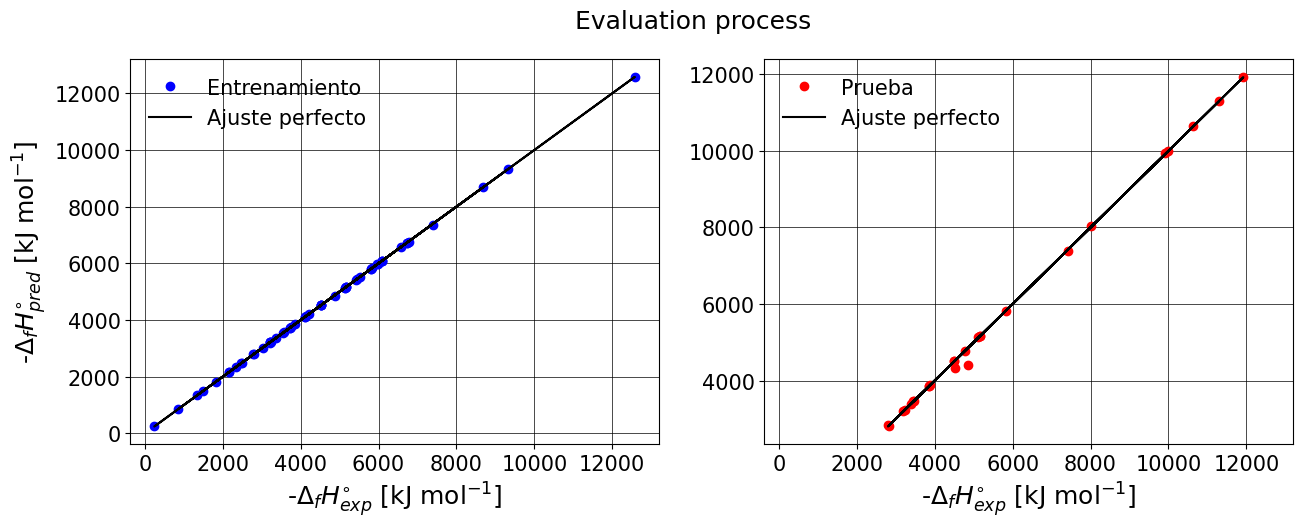

In [105]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_krr_crystalline, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_krr_crystalline, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [106]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_krr_crystalline),5)))
print("The MAE of the training set is: {}".format(mean_absolute_error(y_train,y_pred_train_krr_crystalline).round(4)))
print("The RMSE of the training set is: {}".format(mean_squared_error(y_train,y_pred_train_krr_crystalline,squared=False).round(4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_krr_crystalline),4)))
print("The MAE of the testing set is: {}".format(mean_absolute_error(y_test,y_pred_test_krr_crystalline).round(4)))
print("The RMSE of the testing set is: {}".format(mean_squared_error(y_test,y_pred_test_krr_crystalline,squared=False).round(4)))

The R² of the training set is: 0.99998
The MAE of the training set is: 5.633
The RMSE of the training set is: 9.7835
The R² of the testing set is: 0.9988
The MAE of the testing set is: 35.6762
The RMSE of the testing set is: 94.5998


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [107]:
#DIDAS values
print("the enthalpy of combustion of o-DIDA is {}".format((y_pred_krr_didasc[0]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of combustion of 3,4-DITA is {}".format((y_pred_krr_didasc[3]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of combustion of 3,5-DITA is {}".format((y_pred_krr_didasc[4]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of combustion of o-DIDA is 9894.5 kJ mol⁻¹
the enthalpy of combustion of 3,4-DITA is 9873.2 kJ mol⁻¹
the enthalpy of combustion of 3,5-DITA is 9872.2 kJ mol⁻¹


#DIDAS sublimation


In [108]:
Didasub=pd.read_csv("/content/drive/MyDrive/phyton/DIDA_sub.csv")
Didasub

,Name,Formula,∆subH°,group,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
0,"2,2-Dimethylpropanoic acid",C5H10O2,73.2,acid,0,1,0,1,0,0,...,0,0,0,2,2,0,0,0,0,0
1,Benzoic acid,C7H6O2,90.0,acid,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Salicylic acid,C7H6O3,95.1,acid,0,0,1,1,0,1,...,0,0,0,2,0,0,0,1,0,0
3,2-Methylbenzoic acid,C8H8O2,95.9,acid,0,0,1,1,0,0,...,0,0,0,2,0,0,0,1,0,0
4,3-Methylbenzoic acid,C8H8O2,98.2,acid,0,0,1,1,0,0,...,0,0,0,3,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,pDIDA,C24H12N2O8,NaN,acid,0,0,2,2,0,0,...,2,2,2,4,0,0,0,0,0,1
65,"3,4-DITA",C25H12N2O10,NaN,acid,0,0,3,3,0,0,...,2,2,2,3,4,0,0,0,1,1
66,"3,5-DITA",C25H12N2O10,NaN,acid,0,0,3,3,0,0,...,2,2,2,3,5,0,0,0,2,0
67,"N,N′ -(1,2-phenylene)bis(phthalimide)",C22H12N2O4,NaN,imide,0,0,0,0,0,0,...,2,2,2,2,0,0,0,1,0,0


In [109]:
Didasub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            69 non-null     object 
 1   Formula         69 non-null     object 
 2   ∆subH°          62 non-null     float64
 3   group           69 non-null     object 
 4   CO-(O)(CO)      69 non-null     int64  
 5   CO-(C)(O)       69 non-null     int64  
 6   CO-(O)(CB)      69 non-null     int64  
 7   O-(H)(CO)       69 non-null     int64  
 8   O-(C)(CB)       69 non-null     int64  
 9   O-(H)(CB)       69 non-null     int64  
 10  CD-(H)(CO)      69 non-null     int64  
 11  CB-(CO)(CB)2    69 non-null     int64  
 12  CB-(O)(CB)2     69 non-null     int64  
 13  C-(CO)(C)3      69 non-null     int64  
 14  C-(H)2(CO)(C)   69 non-null     int64  
 15  C-(H)3(O)       69 non-null     int64  
 16  C-(H)3(C)       69 non-null     int64  
 17  C-(H)3(CB)      69 non-null     int64

In [110]:
#Variables
X=Didasub.iloc[:-7,4:]
y=Didasub.iloc[:-7,2]

In [111]:
#Compounds
nDIDAsub=Didasub.iloc[62:, 4:]
nDIDAsub

,CO-(O)(CO),CO-(C)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),O-(H)(CB),CD-(H)(CO),CB-(CO)(CB)2,CB-(O)(CB)2,C-(CO)(C)3,...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
62,0,0,2,2,0,0,0,6,0,0,...,2,2,2,2,0,0,0,1,0,0
63,0,0,2,2,0,0,0,6,0,0,...,2,2,2,3,0,0,0,0,1,0
64,0,0,2,2,0,0,0,6,0,0,...,2,2,2,4,0,0,0,0,0,1
65,0,0,3,3,0,0,0,7,0,0,...,2,2,2,3,4,0,0,0,1,1
66,0,0,3,3,0,0,0,7,0,0,...,2,2,2,3,5,0,0,0,2,0
67,0,0,0,0,0,0,0,4,0,0,...,2,2,2,2,0,0,0,1,0,0
68,0,0,0,0,0,0,0,4,0,0,...,2,2,2,4,0,0,0,0,0,1


In [112]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=296)

##SVR

In [113]:
#SVR
svr=SVR(C=10000, kernel="linear")
svr.fit(X_train,y_train)
print(round(svr.score(X_train,y_train),4))
print(round(svr.score(X_test,y_test),4))

0.968
0.9644


In [114]:
#Prediction
y_pred_train_svr_crystalline=svr.predict(X_train)
y_pred_test_svr_crystalline=svr.predict(X_test)
y_pred_svr_didasc=svr.predict(nDIDAsub)

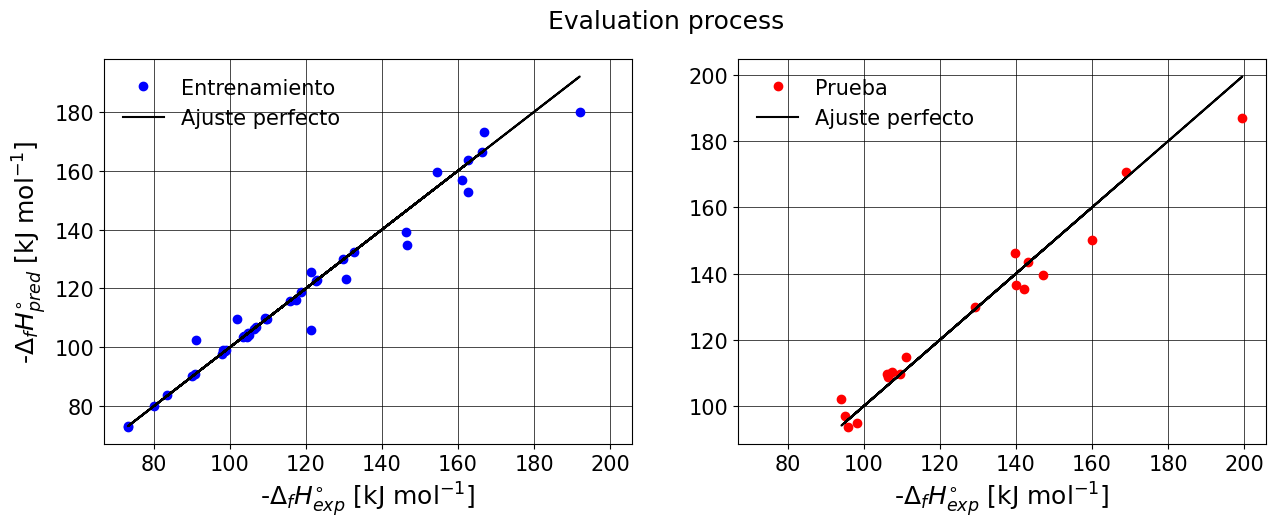

In [115]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_svr_crystalline, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_svr_crystalline, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [116]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_svr_crystalline),4)))
print("The MAE of the training set is: {}".format(mean_absolute_error(y_train,y_pred_train_svr_crystalline).round(4)))
print("The RMSE of the training set is: {}".format(mean_squared_error(y_train,y_pred_train_svr_crystalline,squared=False).round(4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_svr_crystalline),4)))
print("The MAE of the testing set is: {}".format(mean_absolute_error(y_test,y_pred_test_svr_crystalline).round(4)))
print("The RMSE of the testing set is: {}".format(mean_squared_error(y_test,y_pred_test_svr_crystalline,squared=False).round(4)))

The R² of the training set is: 0.968
The MAE of the training set is: 2.5902
The RMSE of the training set is: 4.8769
The R² of the testing set is: 0.9644
The MAE of the testing set is: 4.223
The RMSE of the testing set is: 5.3772


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
#DIDAS values
print("the enthalpy of sublimation of o-DIDA is {}".format((y_pred_svr_didasc[0]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of sublimation of 3,4-DITA is {}".format((y_pred_svr_didasc[3]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of sublimation of 3,5-DITA is {}".format((y_pred_svr_didasc[4]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of sublimation of o-DIDA is 233.3 kJ mol⁻¹
the enthalpy of sublimation of 3,4-DITA is 284.3 kJ mol⁻¹
the enthalpy of sublimation of 3,5-DITA is 285.1 kJ mol⁻¹


##KRR

In [118]:
#KRR
krr=KernelRidge(alpha=0.0001, kernel="linear")
krr.fit(X_train,y_train)
print(round(krr.score(X_train,y_train),4))
print(round(krr.score(X_test,y_test),4))

0.9786
0.9752


In [119]:
#Prediction
y_pred_train_krr_crystalline=krr.predict(X_train)
y_pred_test_krr_crystalline=krr.predict(X_test)
y_pred_krr_didasc=krr.predict(nDIDAsub)

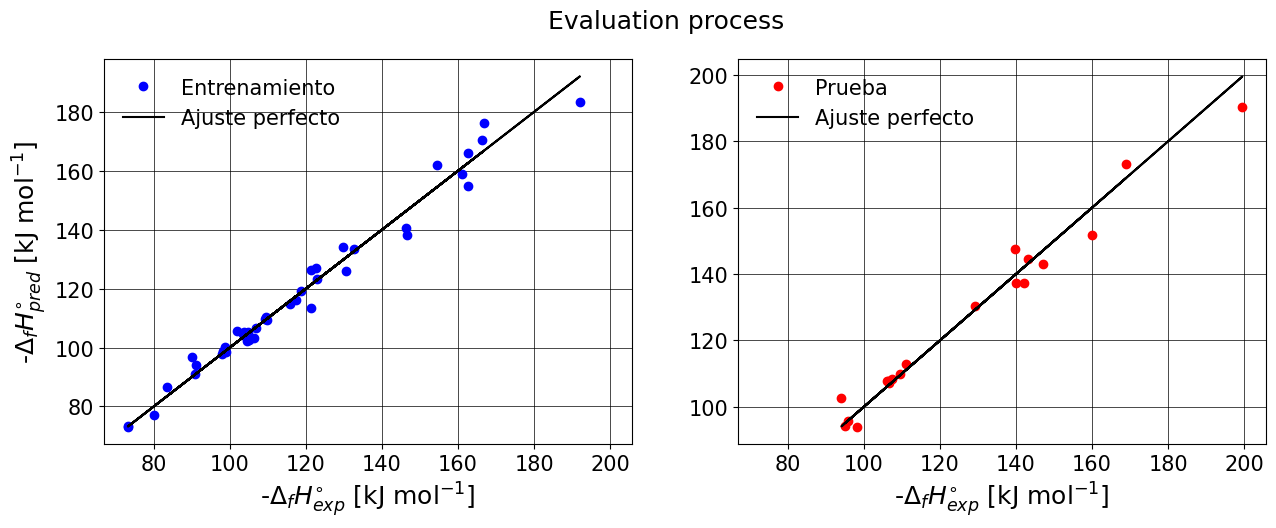

In [120]:
#Training vs Testing set
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train_krr_crystalline, "bo",label="Entrenamiento")
ax0.plot(y_train, y_train, "k-",label="Ajuste perfecto")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("-$\Delta_fH_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test_krr_crystalline, "ro", label="Prueba")
ax1.plot(y_test, y_test, "k-",label="Ajuste perfecto")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("-$\Delta_fH_{exp}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [121]:
#Evaluation metrics
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train_krr_crystalline),4)))
print("The MAE of the training set is: {}".format(mean_absolute_error(y_train,y_pred_train_krr_crystalline).round(4)))
print("The RMSE of the training set is: {}".format(mean_squared_error(y_train,y_pred_train_krr_crystalline,squared=False).round(4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test_krr_crystalline),4)))
print("The MAE of the testing set is: {}".format(mean_absolute_error(y_test,y_pred_test_krr_crystalline).round(4)))
print("The RMSE of the testing set is: {}".format(mean_squared_error(y_test,y_pred_test_krr_crystalline,squared=False).round(4)))

The R² of the training set is: 0.9786
The MAE of the training set is: 2.8662
The RMSE of the training set is: 3.987
The R² of the testing set is: 0.9752
The MAE of the testing set is: 3.3631
The RMSE of the testing set is: 4.4901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [122]:
#DIDAS values
print("the enthalpy of sublimation of o-DIDA is {}".format((y_pred_krr_didasc[0]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of sublimation of 3,4-DITA is {}".format((y_pred_krr_didasc[4]).round(1)), "kJ mol\u207b\u00b9")
print("the enthalpy of sublimation of 3,5-DITA is {}".format((y_pred_krr_didasc[3]).round(1)), "kJ mol\u207b\u00b9")

the enthalpy of sublimation of o-DIDA is 237.7 kJ mol⁻¹
the enthalpy of sublimation of 3,4-DITA is 285.8 kJ mol⁻¹
the enthalpy of sublimation of 3,5-DITA is 287.9 kJ mol⁻¹
